In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [16]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [17]:
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
# clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
clust_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

In [18]:
zones = pd.read_csv('Dataset/Processed/Zone 1-3.csv', index_col='Id')
# zones = zones['Id']
zones.head()

,Zone
Id,
30,1
42,1
40,1
43,1
13,1


In [19]:
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id', dtype=np.float64)
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id')
comparison = pd.read_csv('Dataset/Processed/hourly_comparison_visitor.csv', sep=',', decimal='.', header=0, index_col='id')

comparison = comparison.join(zones, how='inner').drop('Zone', axis=1)

comparison.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168
1,0.484018,0.497436,0.478528,0.382353,0.386364,0.344828,0.330357,0.314050,0.389706,0.382514,0.409756,0.426471,0.441509,0.486804,0.528302,0.500000,0.526596,0.501171,0.491607,0.510112,0.548523,0.474286,0.485955,0.478827,0.458647,0.460251,0.407609,0.386905,0.387755,0.374101,0.376812,0.394366,0.414013,0.409326,0.419355,0.460967,0.501695,0.485876,0.504155,0.512535,0.559659,0.500000,0.525568,0.462185,0.503836,0.500000,0.485149,0.496689,0.539130,0.456044,0.402439,0.398693,0.407692,0.385827,0.360000,0.367188,0.413043,0.385027,0.418803,0.470833,0.464539,0.494810,0.514124,0.553009,0.561856,0.503958,0.503937,0.508021,0.471053,0.485623,0.517123,0.453237,0.513944,0.435644,0.365854,0.340426,0.378571,0.336000,0.325397,0.325397,0.353333,0.413462,0.402344,0.470588,0.526316,0.523035,0.540984,0.533854,0.561308,0.542289,0.530612,0.531034,0.518160,0.501377,0.489231,0.471572,0.459144,0.447619,0.409326,0.380682,0.359756,0.352941,0.401408,0.363636,0.371429,0.388393,0.433594,0.473868,0.529595,0.546218,0.562814,0.553476,0.550122,0.529833,0.498765,0.556627,0.521940,0.527778,0.528529,0.530159,0.521583,0.467532,0.422330,0.408840,0.361963,0.364865,0.360902,0.359155,0.416667,0.478723,0.554167,0.575758,0.591029,0.608108,0.605893,0.578767,0.575207,0.534510,0.520992,0.539256,0.551422,0.540816,0.531856,0.502907,0.578397,0.547718,0.429268,0.422460,0.461538,0.416107,0.453846,0.438017,0.470149,0.496855,0.552381,0.598485,0.632450,0.632979,0.607759,0.615217,0.566740,0.563319,0.608592,0.576087,0.560606,0.541958,0.570312,0.512097
2,0.785714,0.810526,0.687500,0.545455,0.560000,0.600000,0.500000,0.461538,0.617021,0.542373,0.589744,0.660000,0.660714,0.676056,0.733696,0.694268,0.621053,0.638614,0.596330,0.599237,0.570175,0.570048,0.519774,0.580838,0.562092,0.600000,0.467391,0.448718,0.358209,0.378788,0.295082,0.417910,0.370787,0.461538,0.482517,0.520710,0.607843,0.548387,0.590308,0.580769,0.578261,0.519651,0.551440,0.446154,0.512821,0.488584,0.488095,0.511494,0.564417,0.454545,0.458333,0.341772,0.285714,0.294118,0.305556,0.346154,0.387755,0.420290,0.414966,0.491620,0.532338,0.546154,0.583333,0.552174,0.588496,0.594828,0.560345,0.560784,0.575342,0.635897,0.706294,0.683453,0.676692,0.660000,0.577465,0.516129,0.382979,0.416667,0.404255,0.404255,0.420290,0.401869,0.504854,0.574803,0.648276,0.607843,0.651899,0.683230,0.679739,0.660606,0.611765,0.646067,0.670886,0.688742,0.683099,0.701493,0.692982,0.698925,0.741379,0.638889,0.555556,0.535714,0.500000,0.722222,0.555556,0.682540,0.652778,0.710000,0.690141,0.702899,0.703947,0.739645,0.722581,0.726115,0.679104,0.677852,0.707143,0.752000,0.755725,0.771654,0.754902,0.767123,0.660000,0.666667,0.617647,0.588235,0.476190,0.666667,0.705882,0.672727,0.742857,0.810000,0.812030,0.821429,0.795455,0.752525,0.742690,0.777143,0.765823,0.755556,0.780645,0.773333,0.800000,0.740458,0.774194,0.707865,0.721311,0.676471,0.588235,0.571429,0.692308,0.606061,0.594595,0.615385,0.802326,0.722772,0.757353,0.818792,0.762500,0.773723,0.692308,0.720779,0.746479,0.696774,0.716129,0.721854,0.783217,0.719697
3,0.456140,0.306122,0.369565,0.289474,0.250000,0.219512,0.216216,0.302326,0.173913,0.352113,0.365591,0.329412,0.447619,0.433333,0.472222,0.507353,0.500000,0.466216,0.373239,0.447205,0.429825,0.433628,0.462185,0.428571,0.438202,0.400000,0.378378,0.254545,0.264151,0.203125,0.203704,0.246154,0.285714,0.314050,0.417391,0.485915,0.474074,0.496815,0.448718,0.557471,0.559524,0.497207,0.456250,0.470588,0.405797,

In [20]:
division_geo = gpd.read_file('Dataset/Processed/London_division.shp', driver="ESRI Shapefile")
division_geo.head()

,id,name,area,geometry
0,1,Trafalgar Square,0.277425,"POLYGON ((-0.1304619 51.50952, -0.12742117 51...."
1,2,Big Ben,0.399994,"POLYGON ((-0.12498988 51.503284, -0.12284501 5..."
2,3,Parliament Square,0.236767,"POLYGON ((-0.12562872 51.502274, -0.124708146 ..."
3,4,London Eye,0.425408,"POLYGON ((-0.12235283 51.503895, -0.119325526 ..."
4,5,Tate Modern,0.686323,"POLYGON ((-0.0996684 51.51117, -0.095774494 51..."


In [21]:
interval_median_comparison = comparison.median(skipna=True)

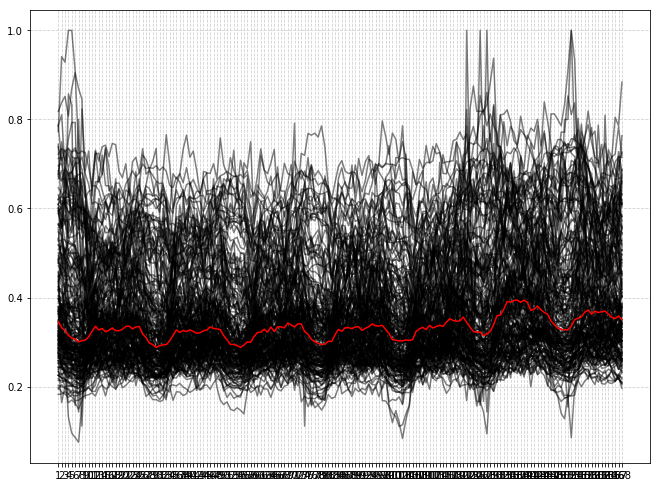

In [22]:
fig, ax = plt.subplots()

for index, row in comparison.iterrows():
    ax.plot(comparison.columns, row, color='#00000080', label=row.name)

ax.plot(comparison.columns, interval_median_comparison, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(comparison.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

In [23]:
mod_steps = 167

def uncluterred_plot(time_series):
    interval_min = time_series.min(skipna=True)
    interval_max = time_series.max(skipna=True)
    interval_mean = time_series.mean(skipna=True)
    interval_median = time_series.median(skipna=True)

    quantile_borders = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    int_quantiles = time_series.quantile(quantile_borders).T

    quant_color_dark  = '#B0B0B0FF'
    quant_color_light = '#F0F0F0FF'
    quant_range_colors = [quant_color_light, quant_color_dark]

    fig, axs = plt.subplots(1, 2, figsize=(1200/screen_dpi,400/screen_dpi))

    ###### First (left) subplot
    ax = axs[0]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Per-cell time series')

    ax.set_xlim(0, mod_steps)
    ax.set_ylim(0)

    ###### Second (right) subplot
    ax = axs[1]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Low-value range details')

    ax.set_xlim(0, mod_steps)
    # Zoom the plot on the low values range for more details
    ax.set_ylim(0, 100)

    ###### Joint legend
    labels = ['Mean', 'Median']
    ax.legend(handles=legend_handles, title='Reference Time Series', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

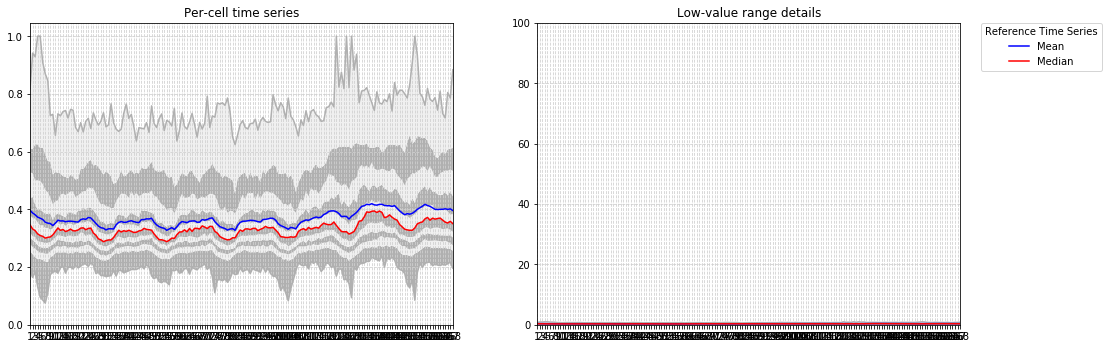

In [24]:
uncluterred_plot(comparison)

In [25]:
k = 5 # 12 is tthe upper limit for k, as ColorBrewer's color scale has 12 colors only.

clust_id_col_name = 'Cluster ID (k={})'.format(k)
# clust_id_col_name = 'Cluster ID'

# time_series.head()

In [26]:
def clusterize(series):    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clus = kmeans.fit(series)
#     clus = kmeans.fit(series.drop([clust_id_col_name], axis=1))
    clustered_series = series.copy()
    clustered_series[clust_id_col_name] = clus.labels_
    
#     centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.drop([clust_id_col_name], axis=1).columns)
#     print(series.drop([clust_id_col_name], axis=1).columns)
    centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.columns)
    cluster_sizes = Counter(clus.labels_)
    for cid, cnt in cluster_sizes.items():
        cluster_sizes[cid] = (cnt, log10(cnt) + 1)

    return (clustered_series, centroids, cluster_sizes)

In [27]:
# comparison = comparison.drop([clust_id_col_name], axis=1)
(comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
comparison_clustered.to_csv('Dataset/clustered_comparison_visitor_{}.csv'.format(k), index_label='id')
comparison_clustered.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,Cluster ID (k=5)
1,0.484018,0.497436,0.478528,0.382353,0.386364,0.344828,0.330357,0.314050,0.389706,0.382514,0.409756,0.426471,0.441509,0.486804,0.528302,0.500000,0.526596,0.501171,0.491607,0.510112,0.548523,0.474286,0.485955,0.478827,0.458647,0.460251,0.407609,0.386905,0.387755,0.374101,0.376812,0.394366,0.414013,0.409326,0.419355,0.460967,0.501695,0.485876,0.504155,0.512535,0.559659,0.500000,0.525568,0.462185,0.503836,0.500000,0.485149,0.496689,0.539130,0.456044,0.402439,0.398693,0.407692,0.385827,0.360000,0.367188,0.413043,0.385027,0.418803,0.470833,0.464539,0.494810,0.514124,0.553009,0.561856,0.503958,0.503937,0.508021,0.471053,0.485623,0.517123,0.453237,0.513944,0.435644,0.365854,0.340426,0.378571,0.336000,0.325397,0.325397,0.353333,0.413462,0.402344,0.470588,0.526316,0.523035,0.540984,0.533854,0.561308,0.542289,0.530612,0.531034,0.518160,0.501377,0.489231,0.471572,0.459144,0.447619,0.409326,0.380682,0.359756,0.352941,0.401408,0.363636,0.371429,0.388393,0.433594,0.473868,0.529595,0.546218,0.562814,0.553476,0.550122,0.529833,0.498765,0.556627,0.521940,0.527778,0.528529,0.530159,0.521583,0.467532,0.422330,0.408840,0.361963,0.364865,0.360902,0.359155,0.416667,0.478723,0.554167,0.575758,0.591029,0.608108,0.605893,0.578767,0.575207,0.534510,0.520992,0.539256,0.551422,0.540816,0.531856,0.502907,0.578397,0.547718,0.429268,0.422460,0.461538,0.416107,0.453846,0.438017,0.470149,0.496855,0.552381,0.598485,0.632450,0.632979,0.607759,0.615217,0.566740,0.563319,0.608592,0.576087,0.560606,0.541958,0.570312,0.512097,3
2,0.785714,0.810526,0.687500,0.545455,0.560000,0.600000,0.500000,0.461538,0.617021,0.542373,0.589744,0.660000,0.660714,0.676056,0.733696,0.694268,0.621053,0.638614,0.596330,0.599237,0.570175,0.570048,0.519774,0.580838,0.562092,0.600000,0.467391,0.448718,0.358209,0.378788,0.295082,0.417910,0.370787,0.461538,0.482517,0.520710,0.607843,0.548387,0.590308,0.580769,0.578261,0.519651,0.551440,0.446154,0.512821,0.488584,0.488095,0.511494,0.564417,0.454545,0.458333,0.341772,0.285714,0.294118,0.305556,0.346154,0.387755,0.420290,0.414966,0.491620,0.532338,0.546154,0.583333,0.552174,0.588496,0.594828,0.560345,0.560784,0.575342,0.635897,0.706294,0.683453,0.676692,0.660000,0.577465,0.516129,0.382979,0.416667,0.404255,0.404255,0.420290,0.401869,0.504854,0.574803,0.648276,0.607843,0.651899,0.683230,0.679739,0.660606,0.611765,0.646067,0.670886,0.688742,0.683099,0.701493,0.692982,0.698925,0.741379,0.638889,0.555556,0.535714,0.500000,0.722222,0.555556,0.682540,0.652778,0.710000,0.690141,0.702899,0.703947,0.739645,0.722581,0.726115,0.679104,0.677852,0.707143,0.752000,0.755725,0.771654,0.754902,0.767123,0.660000,0.666667,0.617647,0.588235,0.476190,0.666667,0.705882,0.672727,0.742857,0.810000,0.812030,0.821429,0.795455,0.752525,0.742690,0.777143,0.765823,0.755556,0.780645,0.773333,0.800000,0.740458,0.774194,0.707865,0.721311,0.676471,0.588235,0.571429,0.692308,0.606061,0.594595,0.615385,0.802326,0.722772,0.757353,0.818792,0.762500,0.773723,0.692308,0.720779,0.746479,0.696774,0.716129,0.721854,0.783217,0.719697,4
3,0.456140,0.306122,0.369565,0.289474,0.250000,0.219512,0.216216,0.302326,0.173913,0.352113,0.365591,0.329412,0.447619,0.433333,0.472222,0.507353,0.500000,0.466216,0.373239,0.447205,0.429825,0.433628,0.462185,0.428571,0.438202,0.400000,0.378378,0.254545,0.264151,0.203125,0.203704,0.246154,0.285714,0.314050,0.417391,0.485915,0.474074,0.496815,0.448718,0.557471,0.559524,0.497207,0.4562

In [54]:
def plot_clusters(time_series, centroids, cluster_sizes, selected_clusters=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(1200/screen_dpi, 900/screen_dpi)

    # Select subset of clusters for detail comparison
    #selected_clusters = [0, 3, 5]
    # or use the next statement to display all clusters simultaneously
    if (selected_clusters is None):
        selected_clusters = [x for x in range(k)]

    x_vals = [x for x in range(mod_steps+1)]
    for index, row in time_series.iterrows():
        cluster_id = row[mod_steps+1]
        if (cluster_id < k and cluster_id in selected_clusters):
#             ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.1, label=index)
            ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.2, label=index)

    legend_handles = [] # Manually collect relevant legend handles, so we can suppress that every single cell's label gets crammed into the legend
    for cluster_id, centroid in centroids.iterrows():
        if (cluster_id in selected_clusters):
            centroid_handle, = ax.plot(centroid.index, centroid, color=clust_colors[int(cluster_id)], alpha= 1.0, linewidth=2, label=cluster_id)
            legend_handles.append(centroid_handle)

#     ax.set_ylabel(target_col)
    ax.set_ylabel('Tourist Share (%)')
    ax.set_xlabel('Hour of the week')
    ax.axhline(y=0.5, color='gray')
    ax.set_yticks([0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
    ax.set_yticklabels(['0%', '20%', '40%', '50%', '60%', '80%', '100%'])
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')
    ax.set_xticks(x_vals[::12])
    ax.set_xticklabels(['Mon-00:00', 'Mon-12:00', 'Tue-00:00', 'Tue-12:00', 'Wed-00:00', 'Wed-12:00', 'Thu-00:00', 'Thu-12:00', 'Fri-00:00', 'Fri-12:00', 'Sat-00:00', 'Sat-12:00', 'Sun-00:00', 'Sun-12:00'])

#     ax.set_ylim(0, max_val)

    plt.title('Tourist Share x Hour of the week')

    labels = [None] * len(selected_clusters)
    for i, cid in enumerate(selected_clusters):
        labels[i] = '{:>2} ({:>4})'.format(cid, cluster_sizes[cid][0])

    plt.legend(handles=legend_handles, title='Cluster ID (Cluster size)', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

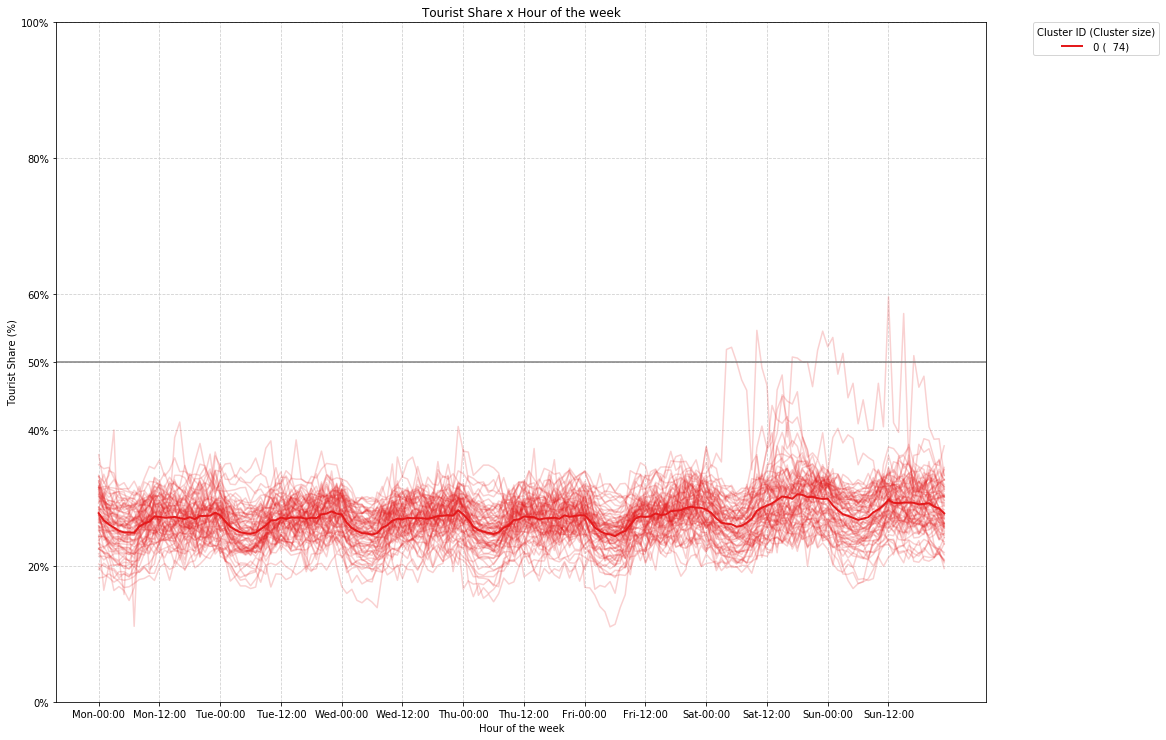

In [55]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [0])

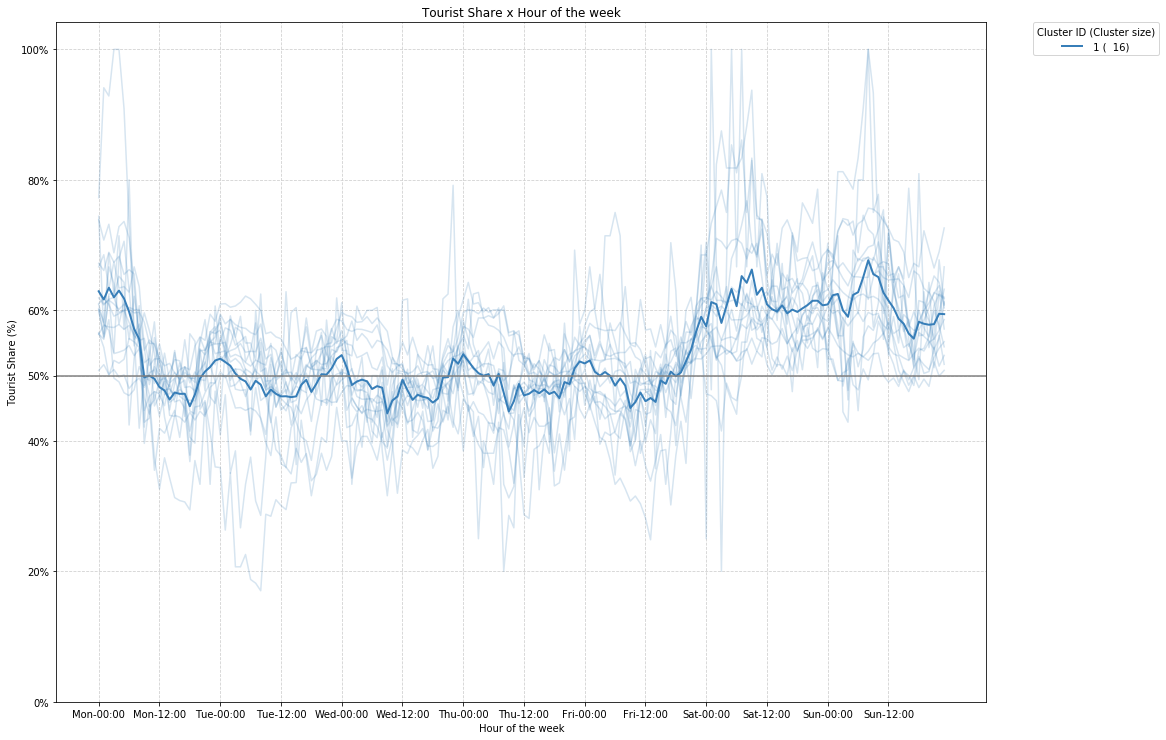

In [56]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [1])

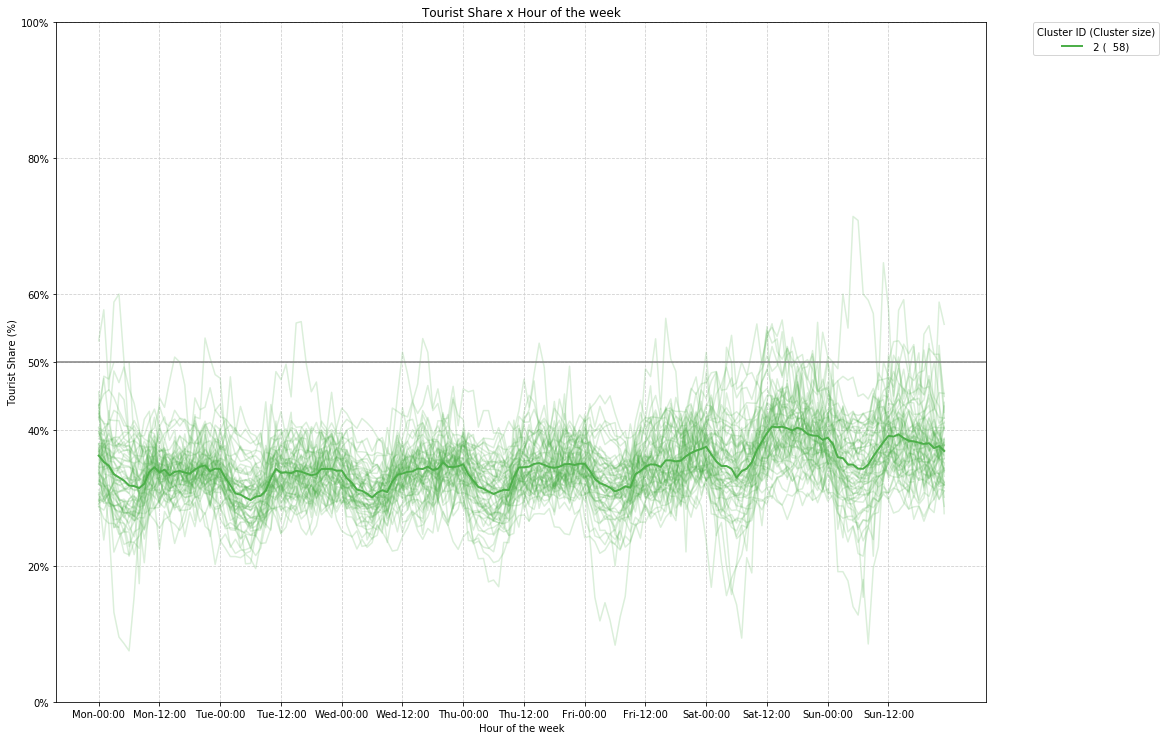

In [57]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [2])

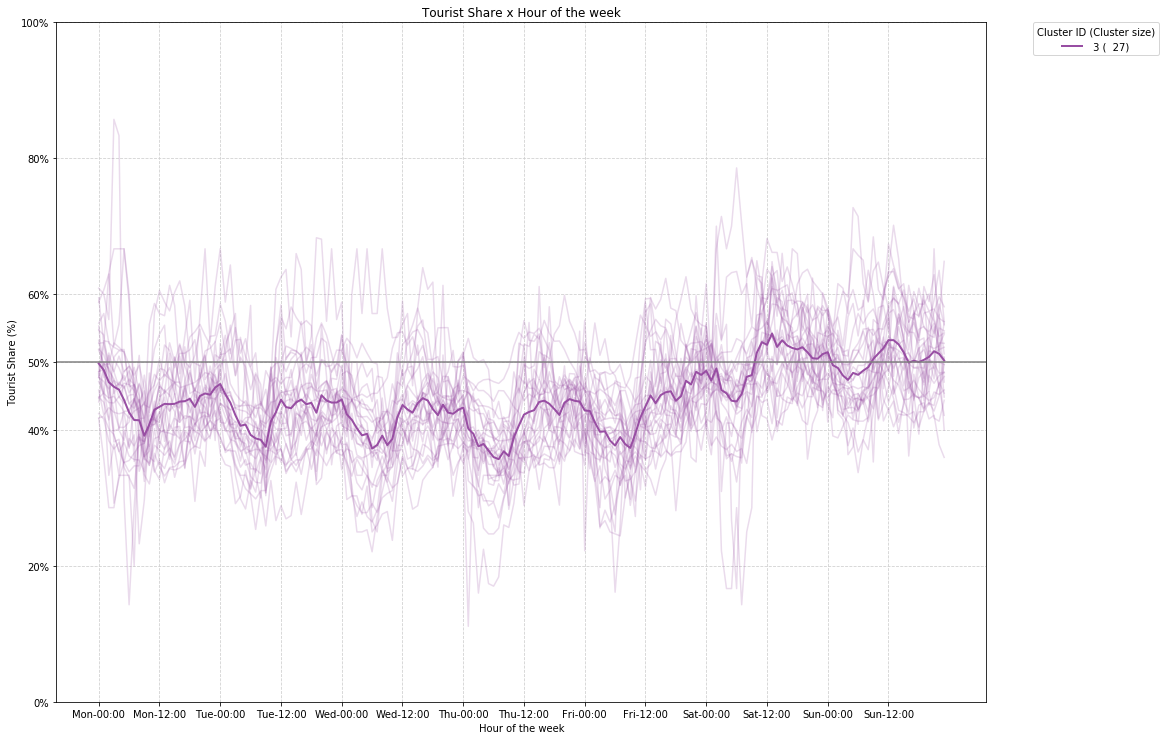

In [58]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [3])

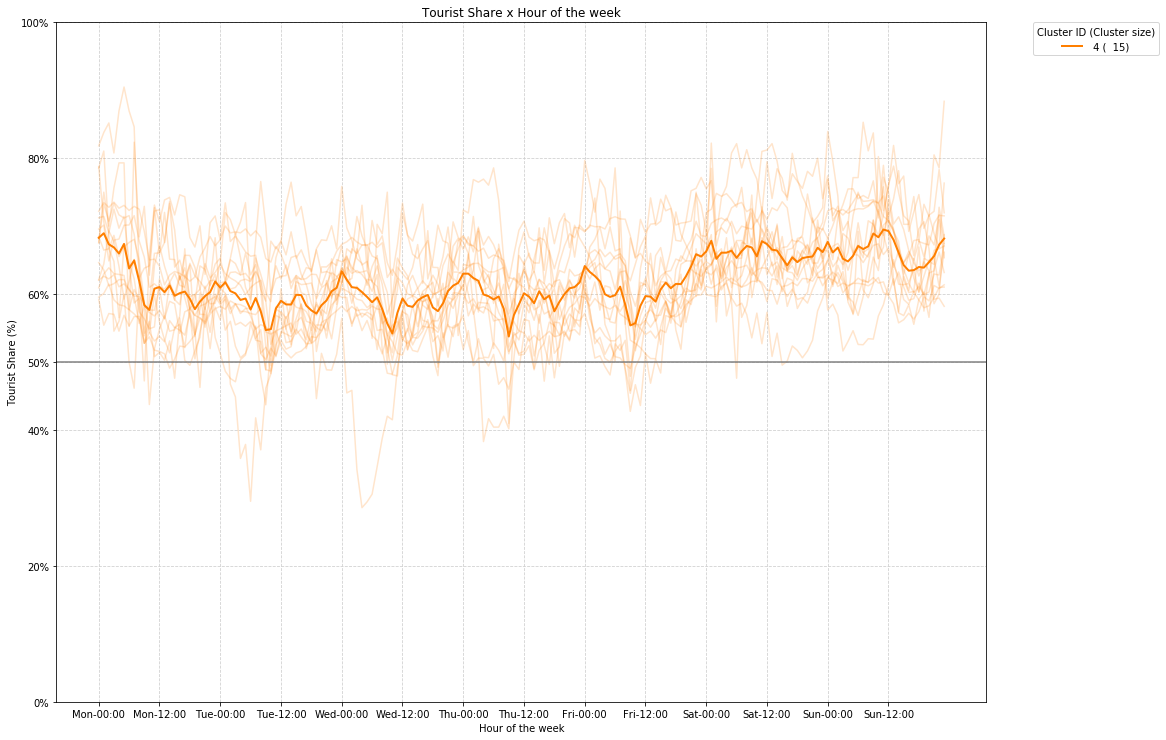

In [59]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [4])

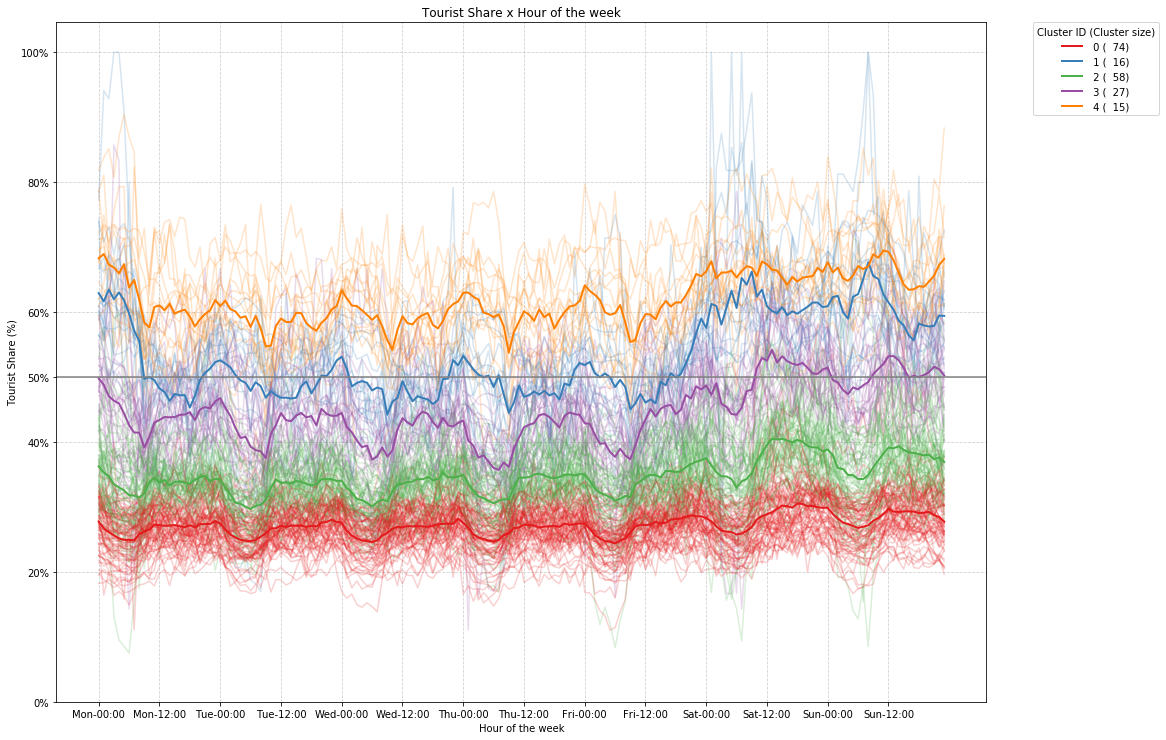

In [60]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)

In [57]:
# for k in range(2,13):
# #     print(k)
# #     clust_id_col_name = 'Cluster ID (k={})'.format(k)
#     comparison = comparison.drop([clust_id_col_name], axis=1)
#     (comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
#     plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)
    